In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Conjunto de datos artificiales

In [ ]:
# Se generan puntos binarios aleatorios, es decir, [x,y].
# Se etiquetan para poderlos separar linealmente en el mapa. 

## Conjunto de datos artificiales linealmente separable

In [ ]:
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

In [ ]:
#Se va a utilizar un Support Vector Classifier para intentar separar los puntos en dos subgrupos con un hiperplano, en este caso, se utilizará una línea.

In [ ]:
# Se entrena el SVC
est = svm.LinearSVC()
est.fit(X, y)

LinearSVC()

In [ ]:
# We generate a grid in the square [-3,3 ]^2.
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

# This function takes a SVM estimator as input.


def plot_decision_function(est, title):
    # We evaluate the decision function on the grid.
    Z = est.decision_function(np.c_[xx.ravel(),
                                    yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues

    # We display the decision function on the grid.
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(Z,
              extent=(xx.min(), xx.max(),
                      yy.min(), yy.max()),
              aspect='auto',
              origin='lower',
              cmap=cmap)

    # We display the boundaries.
    ax.contour(xx, yy, Z, levels=[0],
               linewidths=2,
               colors='k')

    # We display the points with their true labels.
    ax.scatter(X[:, 0], X[:, 1],
               s=50, c=.5 + .5 * y,
               edgecolors='k',
               lw=1, cmap=cmap,
               vmin=0, vmax=1)
    ax.axhline(0, color='k', ls='--')
    ax.axvline(0, color='k', ls='--')
    ax.axis([-3, 3, -3, 3])
    ax.set_axis_off()
    ax.set_title(title)

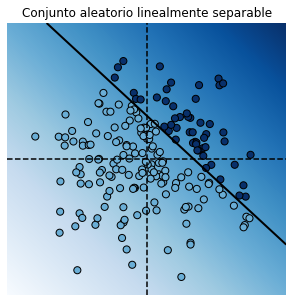

In [ ]:
ax = plot_decision_function(
    est, "Conjunto aleatorio linealmente separable")

In [ ]:
y_pred = est.predict(X)
print(confusion_matrix(y, y_pred))

[[145   0]
 [  0  55]]


In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       145
        True       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred = clf.predict(X)
print(confusion_matrix(y, y_pred))

[[144   1]
 [  6  49]]


In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       145
        True       0.98      0.89      0.93        55

    accuracy                           0.96       200
   macro avg       0.97      0.94      0.95       200
weighted avg       0.97      0.96      0.96       200



##Conjunto de datos artificiales no linealmente separable

Score: 0.4


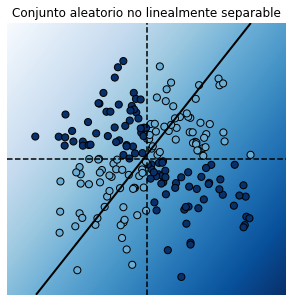

In [ ]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# We train the classifier y comprobamos que NO es linealmente separable.
est = svm.LinearSVC()
est.fit(X, y)
print("Score: {0:.1f}".format(
      ms.cross_val_score(est, X, y).mean()))

# We plot the decision function.
ax = plot_decision_function(
    est, "Conjunto aleatorio no linealmente separable")

In [ ]:
y_pred = est.predict(X)
print(confusion_matrix(y, y_pred))

[[46 53]
 [48 53]]


In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.49      0.46      0.48        99
        True       0.50      0.52      0.51       101

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



### SVM con diferentes Kernels


#### Kernel RBF

Score: 0.930


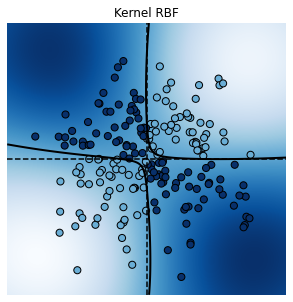

In [ ]:
#se usa kernel RBF porque es el por defecto
est = ms.GridSearchCV(
    svm.SVC(), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X, y).mean()))

plot_decision_function(
    est.best_estimator_, "Kernel RBF")

In [ ]:
y_pred = est.predict(X)
print(confusion_matrix(y, y_pred))

[[ 97   2]
 [  0 101]]


In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99        99
        True       0.98      1.00      0.99       101

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



#### Kernel Polinomial

Score: 0.990


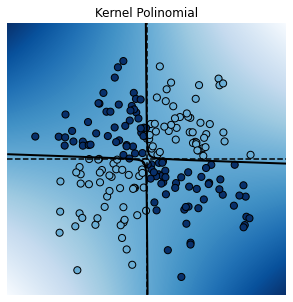

In [ ]:
#se usa poliniomio
est = ms.GridSearchCV(
      svm.SVC(kernel='poly', degree=2), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X, y).mean()))

plot_decision_function(
    est.best_estimator_, "Kernel Polinomial")

In [ ]:
y_pred = est.predict(X)
print(confusion_matrix(y, y_pred))

[[ 97   2]
 [  0 101]]


In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99        99
        True       0.98      1.00      0.99       101

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



#### Kernel Sigmoide

Score: 0.565


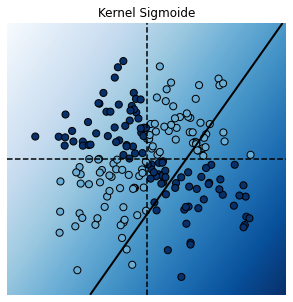

In [ ]:
#se usa sigmoide
est = ms.GridSearchCV(
      svm.SVC(kernel='sigmoid'), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X, y).mean()))

plot_decision_function(
    est.best_estimator_, "Kernel Sigmoide")

In [ ]:
y_pred = est.predict(X)
print(confusion_matrix(y, y_pred))

[[87 12]
 [64 37]]


In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.58      0.88      0.70        99
        True       0.76      0.37      0.49       101

    accuracy                           0.62       200
   macro avg       0.67      0.62      0.59       200
weighted avg       0.67      0.62      0.59       200



In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred = est.predict(X)
print(confusion_matrix(y, y_pred))

[[87 12]
 [64 37]]


In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.58      0.88      0.70        99
        True       0.76      0.37      0.49       101

    accuracy                           0.62       200
   macro avg       0.67      0.62      0.59       200
weighted avg       0.67      0.62      0.59       200



#Conjunto de datos real

## Preprocesamiento de datos

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer_de_mama.csv to cancer_de_mama.csv


In [ ]:
#El dataset indica si el cáncer es maligno o benigno.
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['cancer_de_mama.csv']))
del df["Unnamed: 32"]

In [ ]:
#Reemplazamos M(aligno) por 1 y B(enigno) por -1
#df['diagnosis']=df.diagnosis.replace(['M', 'B'], ['1', '-1'])
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
print("Estructura de los datos:")
print("***************")
print(df.columns)
print(df.dtypes)

Estructura de los datos:
***************
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             fl

In [ ]:
#Se comprueba que el dataset no contiene valores vacíos o NA.
df.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: i

In [ ]:
#Se comprueba que el dataset no contiene valores vacíos o NA.
print("Todos los valores vacíos y NA:")
print("****************************")
for i in df.columns:
    nas = sum(df[i].isnull())
    if nas>0:
        print(i," ", nas)
print("*************")

Todos los valores vacíos y NA:
****************************
*************


In [ ]:
print("Correlations:")
print("*************")
print(df.corr())

Correlations:
*************
                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se   

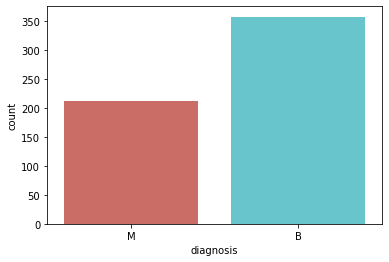

In [ ]:
#Visualize this count
sns.countplot(df['diagnosis'],label="Count",palette='hls')
plt.show()

In [ ]:
#En la gráfica anterior se puede ver que los valores están desbalanceados y, por tanto, cuando entrenemos el modelo no estará haciéndolo de manera equitativa.
#Por esto, se debe hacer un balanceo de los datos haciendo uso de upsampling o downsampling. En este caso, como son pocos registros, haremos upsampling de manera
#que se iguale el numero de valores etiquetados como malignos al número de valores etiquetados como benignos.

In [ ]:
#Pasamos a binario la clase, es decir, si es maligno será 0 1 y si es benigno será 1 0
y = df['diagnosis']
y_num = pd.get_dummies(y)
y_num.tail()

,B,M
564,0,1
565,0,1
566,0,1
567,0,1
568,1,0


In [ ]:
#Finalmente, dejaremos las y como una expresión de las M, siendo 1 Maligno y 0 Benigno
y = y_num.M
print(y.shape)
y.tail()

(569,)


564    1
565    1
566    1
567    1
568    0
Name: M, dtype: uint8

In [ ]:
count_class_0, count_class_1 = y.value_counts()
df_class_0 = df[y == 0]
df_class_1 = df[y == 1]

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)


print('Submuestreo aleatorio:')
print(df_test_under.diagnosis.value_counts())
df_test_under.head()

Submuestreo aleatorio:
B    212
M    212
Name: diagnosis, dtype: int64


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
224,8813129,B,13.270,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,...,15.140,23.60,98.84,708.8,0.1276,0.13110,0.17860,0.09678,0.2506,0.07623
412,905539,B,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,...,9.965,27.99,66.61,301.0,0.1086,0.18870,0.18680,0.02564,0.2376,0.09206
293,891703,B,11.850,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.022800,...,13.060,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
390,90317302,B,10.260,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.019680,...,11.380,15.65,73.23,394.5,0.1343,0.16500,0.08615,0.06696,0.2937,0.07722
165,8712291,B,14.970,19.76,95.50,690.2,0.08421,0.05352,0.01947,0.019390,...,15.980,25.82,102.30,782.1,0.1045,0.09995,0.07750,0.05754,0.2646,0.06085


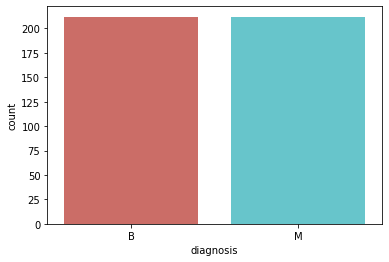

In [ ]:
sns.countplot(df_test_under['diagnosis'],label="Count",palette='hls')
plt.show()

In [ ]:
X = df_test_under.iloc[:,2:32]
print(X.shape)
#X = df.loc[:, df.columns != 'diagnosis'] #Las X serán todas las características
y = df_test_under['diagnosis'] #La y será la clase -> 'M' maligno, 'B' benigno
print(y.shape)
#X_tr, X_tst, y_tr, y_tst = tts(X, y, test_size=30/100, random_state=None)
#est2 = svm.SVC()
#est2.fit(X_tr,y_tr)
#print("Score: {0:.3f}".format(
#     ms.cross_val_score(est, X, y).mean()))

(424, 30)
(424,)


In [ ]:
y_num = pd.get_dummies(y)
y_num.tail()

,B,M
563,0,1
564,0,1
565,0,1
566,0,1
567,0,1


In [ ]:
y = y_num.M
print(y.shape)
y.tail()

(424,)


563    1
564    1
565    1
566    1
567    1
Name: M, dtype: uint8

In [ ]:
#Miramos la correlación entre las múltiples características
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.376887,0.997790,0.988181,0.197581,0.524776,0.696541,0.833423,0.165848,-0.293762,...,0.966857,0.325624,0.963010,0.940330,0.116528,0.386802,0.530201,0.741080,0.127327,0.005869
texture_mean,0.376887,1.000000,0.382344,0.364398,0.018766,0.279956,0.339509,0.338524,0.121442,-0.066116,...,0.402314,0.907168,0.407497,0.384014,0.096540,0.303868,0.337715,0.340485,0.113362,0.141795
perimeter_mean,0.997790,0.382344,1.000000,0.986646,0.234696,0.575432,0.735598,0.861167,0.201178,-0.242464,...,0.966118,0.331762,0.967823,0.939470,0.146326,0.429003,0.567506,0.767544,0.151652,0.048560
area_mean,0.988181,0.364398,0.986646,1.000000,0.197253,0.506535,0.696186,0.826311,0.158910,-0.277909,...,0.958009,0.307536,0.954714,0.955295,0.113176,0.357379,0.506943,0.711849,0.099035,-0.008185
smoothness_mean,0.197581,0.018766,0.234696,0.197253,1.000000,0.660584,0.564746,0.574500,0.551927,0.578590,...,0.242655,0.089203,0.269509,0.226113,0.794033,0.493821,0.486886,0.529596,0.412443,0.502465
compactness_mean,0.524776,0.279956,0.575432,0.506535,0.660584,1.000000,0.892441,0.835043,0.609710,0.559938,...,0.548257,0.289051,0.603952,0.511536,0.541480,0.862037,0.834751,0.821808,0.495034,0.668054
concavity_mean,0.696541,0.339509,0.735598,0.696186,0.564746,0.892441,1.000000,0.929869,0.511651,0.347664,...,0.698034,0.326992,0.739943,0.676330,0.451515,0.733676,0.874051,0.858077,0.370558,0.499246
concave points_mean,0.833423,0.338524,0.861167,0.826311,0.574500,0.835043,0.929869,1.000000,0.469604,0.174618,...,0.834383,0.324716,0.860659,0.806026,0.437760,0.644543,0.756778,0.906042,0.340251,0.355501
symmetry_mean,0.165848,0.121442,0.201178,0.158910,0.551927,0.609710,0.511651,0.469604,1.000000,0.480225,...,0.200451,0.153907,0.233203,0.180205,0.409314,0.484062,0.453596,0.446516,0.705823,0.439317
fractal_dimension_mean,-0.293762,-0.066116,-0.242464,-0.277909,0.578590,0.559938,0.347664,0.174618,0.480225,1.000000,...,-0.237441,-0.019431,-0.187505,-0.230159,0.500038,0.495341,0.382963,0.199200,0.361303,0.770253


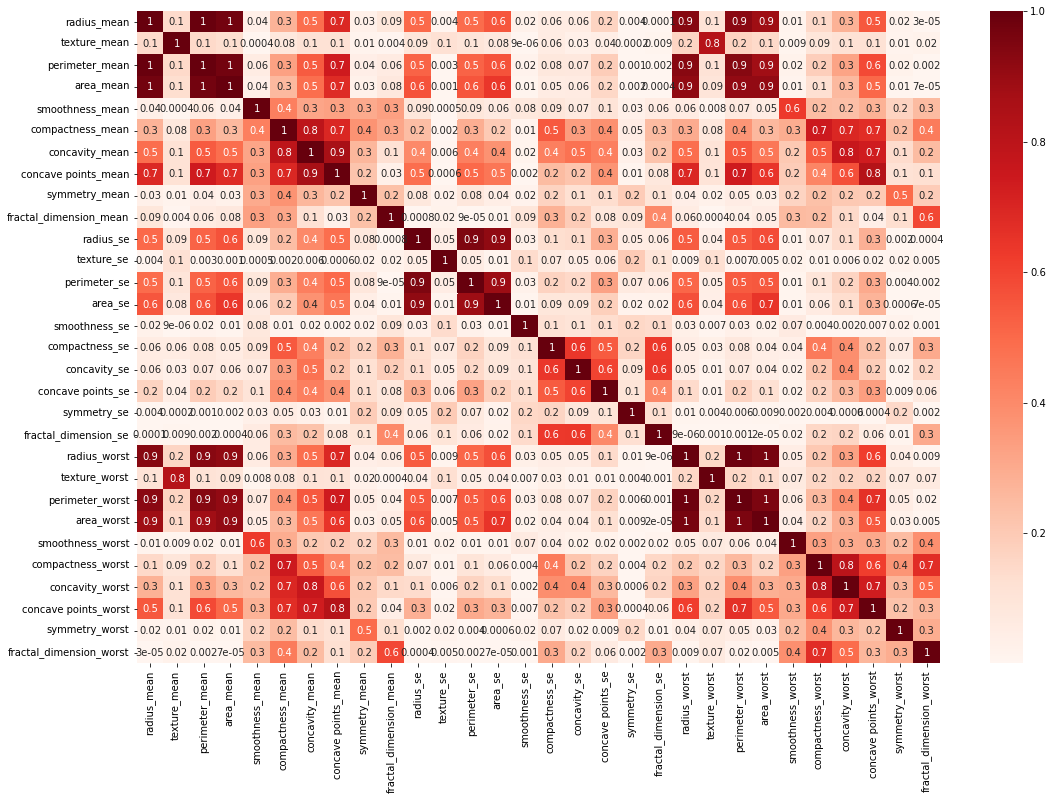

In [ ]:
#Se muestra en un mapa de calor las correlaciones entre las características
plt.figure(figsize=(18,12))
cor = X.corr()
sns.heatmap(cor**2, annot = True,cmap= plt.cm.Reds, fmt='.1g')
plt.show()
#En este mapa de calor, se puede observar que hay variables que están bastante correlacionadas, las cuales son: radius_mean, perimeter_mean y area_mean,
#ya que el perímetro y el área dependen del radio. Lo mismo pasa con el radius_worst y radius_se

In [ ]:
#We have 30 columns/attributes in the predictors dataframe. Dealing with so many attributes becomes difficult because it is hard 
#to visualize data in 30 different dimensions.
#The aim in this step is to reduce the attributes from 30 to ~10 without loosing the key components of the available data.
#Para eso utilizamos PCA -> Identifying and choosing the principal components among the various components we have to predict an output efficiently.

In [ ]:
#reducing the attributes in X dataframe

#1 scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#2 drop the highly correlated columns which are not useful i.e., area, perimeter, perimeter_worst, area_worst, perimeter_se, area_se 
X_scaled = pd.DataFrame(X_scaled)
X_scaled_drop = X_scaled.drop(X_scaled.columns[[2, 3, 12, 13, 22, 23]], axis=1)

#3 apply PCA on scaled data
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X_scaled_drop)
x_pca = pd.DataFrame(x_pca)

print("Before PCA, X dataframe shape = ",X.shape,"\nAfter PCA, x_pca dataframe shape = ",x_pca.shape)

Before PCA, X dataframe shape =  (424, 30) 
After PCA, x_pca dataframe shape =  (424, 11)


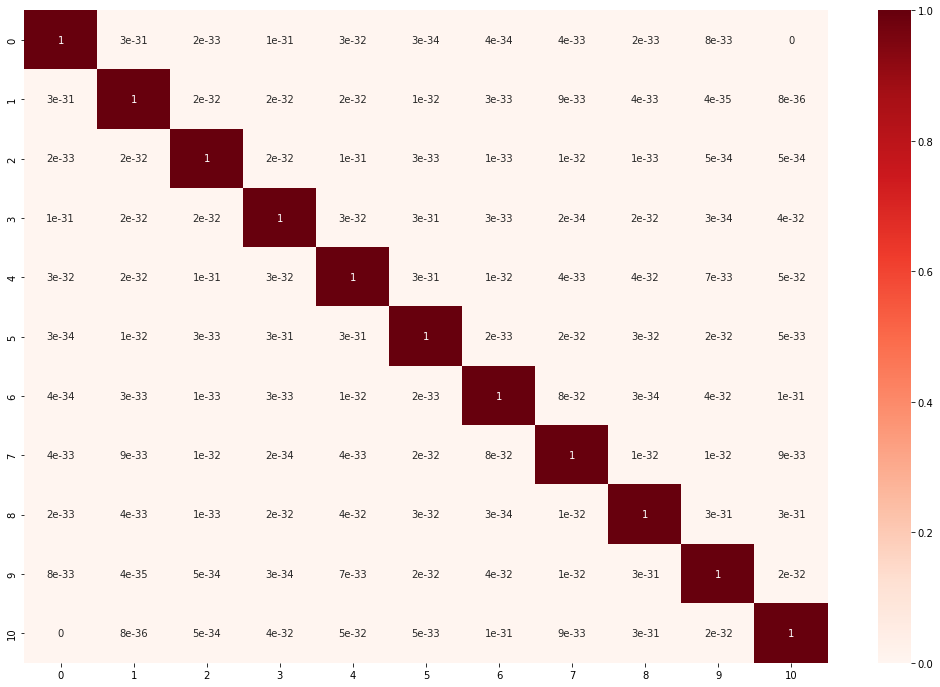

In [ ]:
#Después de haber hecho el PCA, se muestra el mapa de calor de nuevo donde se ve que se han seleccionado las características más significativas
plt.figure(figsize=(18,12))
cor = x_pca.corr()
sns.heatmap(cor**2, annot = True,cmap= plt.cm.Reds, fmt='.1g')
plt.show()

## Entrenamiento y test



In [ ]:
colnames = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 'PC11', 'diagnosis']

#target data
diag = df_test_under.iloc[:,1:2]

#combine PCA and target data
Xy = pd.DataFrame(np.hstack([x_pca,diag.values]),columns=colnames)
Xy.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,diagnosis
0,-3.132794,-0.622136,-0.113439,-0.472331,0.724269,0.280687,0.369044,-0.069528,-0.003304,0.476074,0.014955,B
1,-3.271913,1.383723,0.257588,1.377351,2.230073,0.011607,-0.364794,-0.907973,-0.167053,0.384243,-0.74441,B
2,-2.873524,0.142589,-0.389415,0.393389,-0.500712,-0.205209,0.803417,0.411474,0.140715,-0.020916,0.738491,B
3,-3.234225,1.399917,-1.694932,-1.655301,-0.391435,-0.204305,-0.260453,0.066708,-0.14242,-0.199613,-0.295623,B
4,-4.066246,-1.537573,0.33302,0.310961,0.20752,-0.769612,0.019685,-0.034667,0.29306,0.115909,-0.488045,B


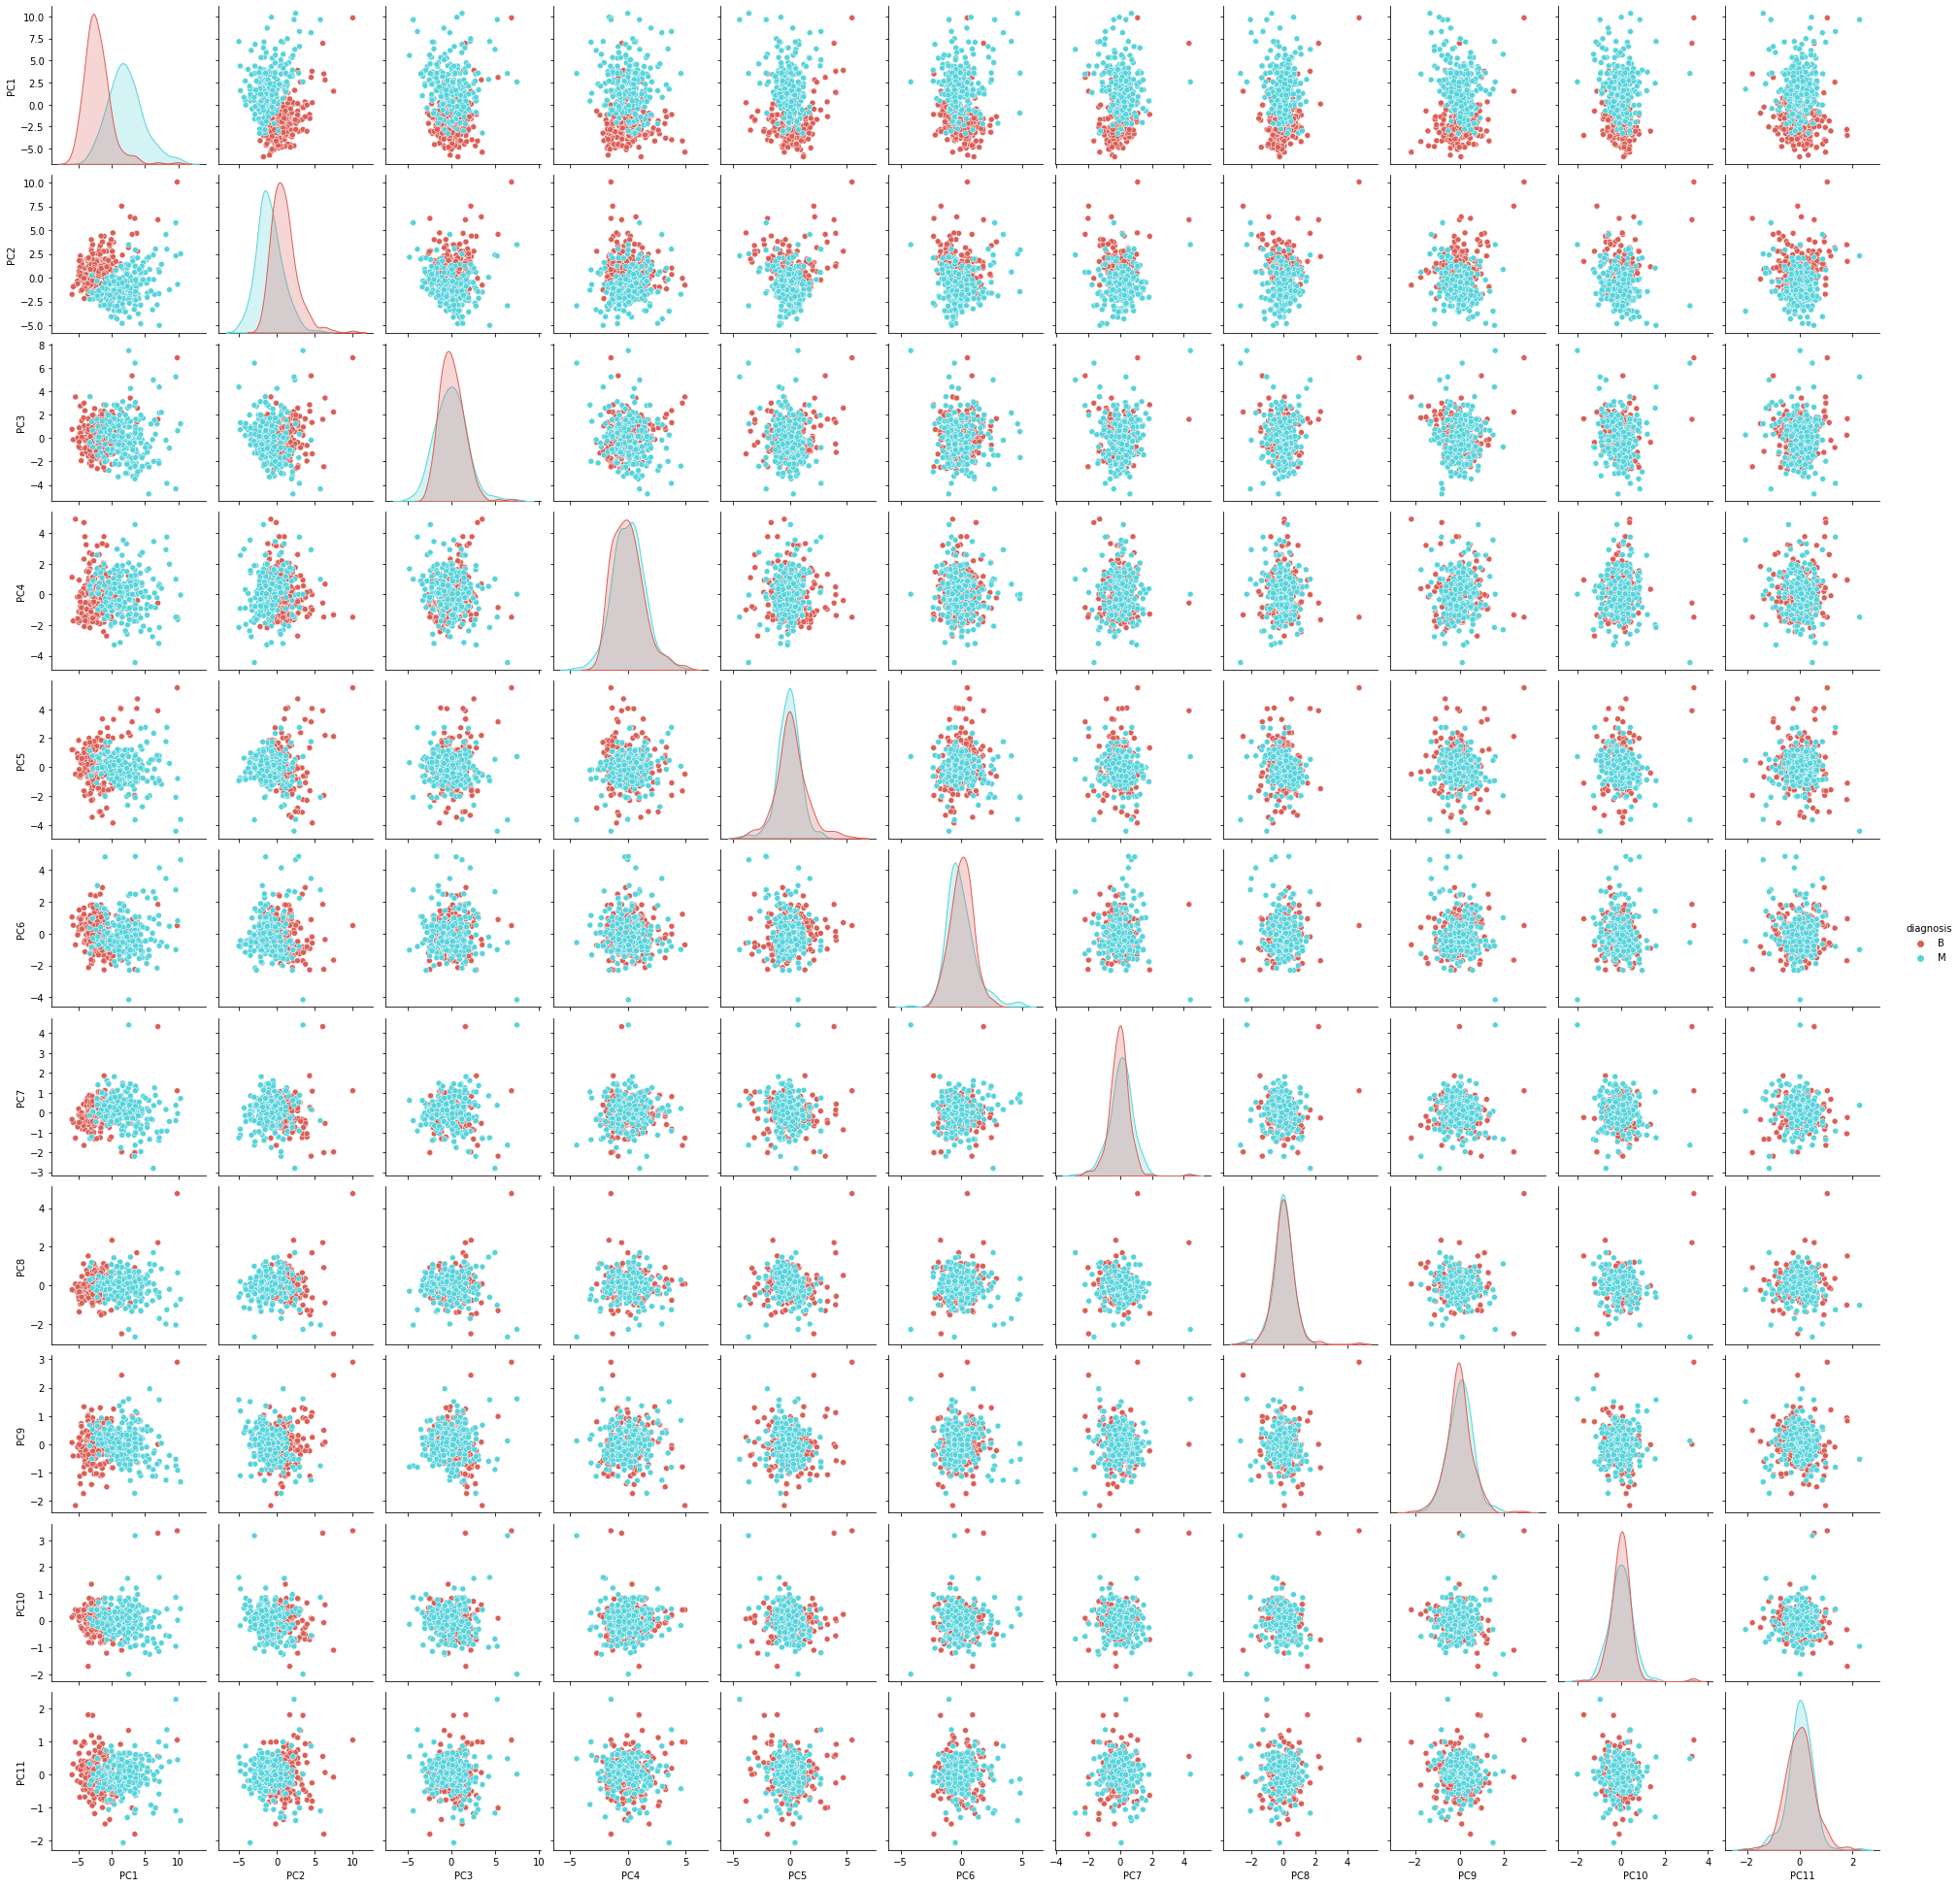

In [ ]:
sns.pairplot(Xy, hue='diagnosis',palette='hls')

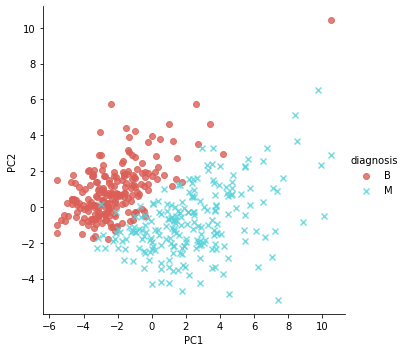

In [ ]:
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False, markers=["o", "x"], palette='hls')
plt.show()

In [ ]:
X=(Xy.iloc[:,0:10]).values
#75:25 train:test data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train shape ",X_train.shape)
print("y_train shape ",y_train.shape)
print("X_test shape ",X_test.shape)
print("y_test shape ",y_test.shape)

X_train shape  (318, 10)
y_train shape  (318,)
X_test shape  (106, 10)
y_test shape  (106,)


## SVM con diferentes Kernels

### Kernel RBF

In [ ]:
#model fitting
svc = svm.SVC()
svc.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(svc, X, y).mean()))

Score: 0.972


In [ ]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[62  0]
 [ 2 42]]


In [ ]:
print(classification_report(y_test, y_pred)) #Upsampling o Downsampling / Falta balancear

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        62
           1       1.00      0.95      0.98        44

    accuracy                           0.98       106
   macro avg       0.98      0.98      0.98       106
weighted avg       0.98      0.98      0.98       106



### Kernel Polinomial

In [ ]:
#model fitting
svc = svm.SVC(kernel='poly')
svc.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(svc, X, y).mean()))

Score: 0.955


In [ ]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[61  1]
 [ 1 43]]


In [ ]:
print(classification_report(y_test, y_pred)) #Upsampling o Downsampling / Falta balancear

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.98      0.98      0.98        44

    accuracy                           0.98       106
   macro avg       0.98      0.98      0.98       106
weighted avg       0.98      0.98      0.98       106



### Kernel Sigmoide

In [ ]:
#model fitting
svc = svm.SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(svc, X, y).mean()))

Score: 0.946


In [ ]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[58  4]
 [ 1 43]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        62
           1       0.91      0.98      0.95        44

    accuracy                           0.95       106
   macro avg       0.95      0.96      0.95       106
weighted avg       0.95      0.95      0.95       106



# Algoritmos Clasificadores

### Random Forest

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[54  8]
 [ 3 41]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        62
           1       0.84      0.93      0.88        44

    accuracy                           0.90       106
   macro avg       0.89      0.90      0.89       106
weighted avg       0.90      0.90      0.90       106



### K Neighbors

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = neigh.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[61  1]
 [ 2 42]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        62
           1       0.98      0.95      0.97        44

    accuracy                           0.97       106
   macro avg       0.97      0.97      0.97       106
weighted avg       0.97      0.97      0.97       106



### Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = neigh.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[61  1]
 [ 2 42]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        62
           1       0.98      0.95      0.97        44

    accuracy                           0.97       106
   macro avg       0.97      0.97      0.97       106
weighted avg       0.97      0.97      0.97       106



[Text(0.5130208333333334, 0.9375, 'X[0] <= -0.208\ngini = 0.498\nsamples = 318\nvalue = [150, 168]'),
 Text(0.2760416666666667, 0.8125, 'X[1] <= -1.215\ngini = 0.307\nsamples = 169\nvalue = [137, 32]'),
 Text(0.08333333333333333, 0.6875, 'X[0] <= -3.354\ngini = 0.191\nsamples = 28\nvalue = [3, 25]'),
 Text(0.041666666666666664, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.125, 0.5625, 'X[7] <= 0.842\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.08333333333333333, 0.4375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.16666666666666666, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.46875, 0.6875, 'X[6] <= 1.326\ngini = 0.094\nsamples = 141\nvalue = [134, 7]'),
 Text(0.3541666666666667, 0.5625, 'X[2] <= -1.854\ngini = 0.07\nsamples = 138\nvalue = [133, 5]'),
 Text(0.25, 0.4375, 'X[4] <= 0.66\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.20833333333333334, 0.3125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.2916666666666667, 0.

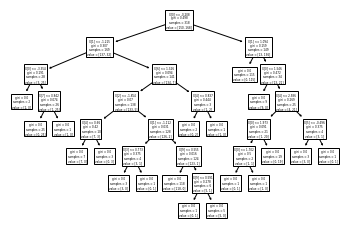

In [ ]:
tree.plot_tree(clf)